In [84]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv("C:\\Users\\swati\\Downloads\\LT\\LT\\train_aox2Jxw\\train.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [6]:
train["Disbusrsal_year"] = train["DisbursalDate"].str[6:]
train["Birth_year"]= train["Date.of.Birth"].str[6:]

In [7]:
train["Age"] = 100+ (train["Disbusrsal_year"].astype(str).astype(int)  - train["Birth_year"].astype(str).astype(int))

In [8]:
train["Age"].head(5)

0    34
1    33
2    33
3    25
4    41
Name: Age, dtype: int32

In [9]:
import matplotlib as plt

In [58]:
train["PERFORM_CNS.SCORE.DESCRIPTION"].value_counts(normalize = True)

No Bureau History Available                                0.501600
C-Very Low Risk                                            0.068817
A-Very Low Risk                                            0.060578
D-Very Low Risk                                            0.048715
B-Very Low Risk                                            0.039463
M-Very High Risk                                           0.037640
F-Low Risk                                                 0.036392
K-High Risk                                                0.035500
H-Medium Risk                                              0.029401
E-Low Risk                                                 0.024966
I-Medium Risk                                              0.023834
G-Low Risk                                                 0.017105
Not Scored: Sufficient History Not Available               0.016148
J-High Risk                                                0.016075
Not Scored: Not Enough Info available on the cus

In [10]:
train_thin = train[train["PERFORM_CNS.SCORE.DESCRIPTION"].isin(['No Bureau History Available','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: Only a Guarantor','Not Scored: More than 50 active Accounts found' ])].reset_index()

In [11]:
train_thin.shape
train_thin=train_thin.drop(['index'],axis = 1)

In [12]:
train_thick =train[~train["PERFORM_CNS.SCORE.DESCRIPTION"].isin(['No Bureau History Available','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: Only a Guarantor','Not Scored: More than 50 active Accounts found' ])].reset_index()

In [13]:
train_thick.shape

(104903, 45)

In [14]:
train_thick.head(5)

,index,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Disbusrsal_year,Birth_year,Age
0,1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,18,85,33
1,3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,18,93,25
2,5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,...,0,0,0,1yrs 9mon,2yrs 0mon,0,0,18,90,28
3,8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,...,0,0,0,4yrs 8mon,4yrs 8mon,1,0,18,91,27
4,9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,...,0,0,0,1yrs 7mon,1yrs 7mon,0,0,18,68,50


In [15]:
train_thick=train_thick.drop(['index'],axis = 1)

In [16]:
train_thick.sort_values(by = ["Age"],inplace = True)
train_thin.sort_values(by = ["Age"],inplace = True)


In [17]:
train_thick["Age_band"]= pd.qcut(train_thick["Age"],10)
train_thin["Age_band"]= pd.qcut(train_thick["Age"],10)


In [18]:
train_thick["Age_band"].value_counts(normalize = True)

train_thin["Age_band"].value_counts(normalize = True)

pd.crosstab(train_thick["Age_band"],train_thick["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

pd.crosstab(train_thin["Age_band"],train_thin["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

train_thick.info()

train_thick["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"].value_counts()

train_thin["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"].value_counts(normalize = True)

train_thin["Employment.Type"].value_counts(normalize = True)

pd.crosstab(train_thin["Employment.Type"],train_thin["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

train_thick["Employment.Type"].value_counts(normalize = True)

pd.crosstab(train_thick["Employment.Type"],train_thick["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

pd.crosstab(train_thick["MobileNo_Avl_Flag"],train_thick["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

pd.crosstab(train_thin["MobileNo_Avl_Flag"],train_thin["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

pd.crosstab(train_thick["Aadhar_flag"],train_thick["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

train_thick["Aadhar_flag"].value_counts(normalize = True)

train_thin["Aadhar_flag"].value_counts(normalize = True)

pd.crosstab(train_thin["Aadhar_flag"],train_thin["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

(18.999, 25.0]    0.127422
(27.0, 30.0]      0.121541
(32.0, 35.0]      0.112180
(41.0, 45.0]      0.106260
(35.0, 38.0]      0.103305
(45.0, 50.0]      0.097309
(50.0, 118.0]     0.090874
(38.0, 41.0]      0.088997
(30.0, 32.0]      0.079235
(25.0, 27.0]      0.072877
Name: Age_band, dtype: float64

In [20]:
train_thick["Curr_Utilization"] = train_thick["PRI.CURRENT.BALANCE"]/train_thick["PRI.DISBURSED.AMOUNT"]

train_thick["Curr_Utilization"].value_counts(normalize = True)

train_thick[train_thick["PRI.CURRENT.BALANCE"]>0]

train_thick["Curr_util_rev"] = np.where(train_thick["Curr_Utilization"] <= 0, 0 , train_thick["Curr_Utilization"])
train_thick["Curr_util_rev1"] = np.where(train_thick["PRI.DISBURSED.AMOUNT"]== 0 ,0,train_thick["Curr_util_rev"] )

In [122]:
train_thick["Curr_util_rev1"].value_counts(normalize = True)

0.000000    0.214083
1.000000    0.025042
0.500000    0.002431
0.400000    0.001335
0.100000    0.001239
0.200000    0.001230
0.333333    0.001163
0.300000    0.001144
0.600000    0.001049
0.166667    0.000829
0.700000    0.000715
0.250000    0.000715
0.800000    0.000648
0.666667    0.000620
0.416667    0.000562
0.083333    0.000448
0.833333    0.000229
0.285714    0.000229
0.428571    0.000210
0.750000    0.000191
0.583333    0.000181
0.499937    0.000172
0.142857    0.000162
0.571429    0.000162
0.375000    0.000143
0.900000    0.000133
0.533333    0.000133
0.444444    0.000114
0.374700    0.000114
0.499749    0.000114
              ...   
0.998410    0.000010
0.587339    0.000010
0.677796    0.000010
0.857218    0.000010
0.794697    0.000010
0.902907    0.000010
0.882583    0.000010
0.865090    0.000010
0.664377    0.000010
0.312740    0.000010
0.542255    0.000010
1.048421    0.000010
0.366895    0.000010
0.836010    0.000010
0.626691    0.000010
0.990929    0.000010
0.989768    0

In [21]:
train_thick.sort_values(by = ["Curr_util_rev1"],inplace = True)

pd.crosstab(train_thick["Curr_util_rev1"],train_thick["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

loan_default,0,1
Curr_util_rev1,,
0.000000,0.797578,0.202422
0.000003,1.000000,0.000000
0.000004,1.000000,0.000000
0.000014,0.000000,1.000000
0.000018,0.000000,1.000000
0.000019,1.000000,0.000000
0.000020,1.000000,0.000000
0.000023,1.000000,0.000000
0.000024,1.000000,0.000000


In [22]:
train_thick["Sec_Curr_Utilization"] = train_thick["SEC.CURRENT.BALANCE"]/train_thick["SEC.DISBURSED.AMOUNT"]

train_thick["Sec_Curr_Utilization"].value_counts(normalize = True)

train_thick[train_thick["SEC.CURRENT.BALANCE"]>0]

train_thick["Sec_Curr_util_rev"] = np.where(train_thick["Sec_Curr_Utilization"] <= 0, 0 , train_thick["Sec_Curr_Utilization"])
train_thick["Sec_Curr_util_rev1"] = np.where(train_thick["SEC.DISBURSED.AMOUNT"]== 0 ,0,train_thick["Sec_Curr_util_rev"] )

In [23]:
train_thick.loc[(train_thick["PRI.DISBURSED.AMOUNT"] < train_thick["PRI.CURRENT.BALANCE"]), "dis_gt_bl"]= 1
train_thick.loc[~(train_thick["PRI.DISBURSED.AMOUNT"] < train_thick["PRI.CURRENT.BALANCE"]), "dis_gt_bl"]= 0

In [24]:
train_thick_1 = train_thick

In [25]:
train_thick_1["dis_sanc_amt"]= train_thick["PRI.SANCTIONED.AMOUNT"] - train_thick["PRI.DISBURSED.AMOUNT"] 

In [570]:
train_thick_1["PRI.NO.OF.ACCTS"].value_counts(normalize = True)

train_thick_1.sort_values(by = ["PRI.ACTIVE.ACCTS"],inplace = True)

pd.crosstab(train_thick_1["PRI.ACTIVE.ACCTS"],train_thick_1["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

1      0.251099
2      0.173303
3      0.119701
4      0.086728
5      0.067710
6      0.052353
7      0.041667
8      0.033736
9      0.027301
10     0.022402
11     0.018141
12     0.014804
13     0.013231
14     0.010677
15     0.008903
16     0.007578
17     0.006139
18     0.005405
19     0.004776
20     0.004137
21     0.003298
22     0.003060
24     0.002726
23     0.002364
25     0.001773
26     0.001621
27     0.001458
28     0.001344
29     0.001239
30     0.001173
         ...   
87     0.000029
76     0.000029
82     0.000019
108    0.000019
70     0.000019
73     0.000019
94     0.000019
90     0.000019
81     0.000019
148    0.000019
84     0.000019
132    0.000010
124    0.000010
120    0.000010
114    0.000010
113    0.000010
147    0.000010
131    0.000010
104    0.000010
102    0.000010
86     0.000010
271    0.000010
453    0.000010
100    0.000010
99     0.000010
85     0.000010
354    0.000010
83     0.000010
136    0.000010
88     0.000010
Name: PRI.NO.OF.ACCTS, L

In [27]:
train_thick_1.loc[(train_thick_1["PRI.ACTIVE.ACCTS"] == 0), "active_accts_band"]= "No active accts"
train_thick_1.loc[(train_thick_1["PRI.ACTIVE.ACCTS"] >0) & (train_thick_1["PRI.ACTIVE.ACCTS"] < 3), "active_accts_band"]= "1-2 active accts"
train_thick_1.loc[(train_thick_1["PRI.ACTIVE.ACCTS"] >2) , "active_accts_band"]= "Greater than 3 active accts"


In [574]:
train_thick_1["active_accts_band"].value_counts(normalize = True)

pd.crosstab(train_thick_1["active_accts_band"],train_thick_1["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

pd.crosstab(train_thick_1["PRI.OVERDUE.ACCTS"],train_thick_1["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

train_thick_1.describe()

train_thick_1.info()

train_thick_1["PAN_flag"].value_counts(normalize = True)

from sklearn.model_selection import train_test_split

print(train_thick_1["Passport_flag"].value_counts(normalize = True))

print(train_thick_1["Aadhar_flag"].value_counts(normalize = True))

print(train_thick_1["VoterID_flag"].value_counts(normalize = True))

print(train_thick_1["Driving_flag"].value_counts(normalize = True))

train_thick_1.head(5)

train_thick_1["CREDIT.HISTORY.LENGTH"]

1-2 active accts               0.524132
Greater than 3 active accts    0.307398
No active accts                0.168470
Name: active_accts_band, dtype: float64

In [28]:
new = train_thick_1["CREDIT.HISTORY.LENGTH"].str.split("yrs", n = 1, expand = True)

new_1 = new[1].str.split("mon",n=1,expand=True)

new_all = pd.concat([new, new_1], axis=1)
# print(new_all)
new_all.columns= ["yrs","text_mon","months","drop"]
new_all_2= new_all[["yrs","months"]]
new_all_2["yrs"] = new_all_2["yrs"].astype(str).astype(int)
new_all_2["months"] = new_all_2["months"].astype(str).astype(int)
print(new_all_2.info())

new_all_2["point_years"] = new_all_2["months"]/12

new_all_2.head(5)

new_all_2["mob"] = new_all_2["yrs"] + new_all_2["point_years"]
mob = pd.DataFrame(new_all_2["mob"])
print(mob.head(5))

train_thick_1 = train_thick_1.merge(mob,left_index = True,right_index = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104903 entries, 43185 to 50345
Data columns (total 2 columns):
yrs       104903 non-null int32
months    104903 non-null int32
dtypes: int32(2)
memory usage: 1.6 MB
None


C:\Users\swati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\swati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [594]:
train_thick_1.info()

train_thick_1.State_ID.nunique()

train_thick_1["NEW.ACCTS.IN.LAST.SIX.MONTHS"].value_counts(normalize = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104903 entries, 43185 to 50345
Data columns (total 57 columns):
UniqueID                               104903 non-null int64
disbursed_amount                       104903 non-null int64
asset_cost                             104903 non-null int64
ltv                                    104903 non-null float64
branch_id                              104903 non-null int64
supplier_id                            104903 non-null int64
manufacturer_id                        104903 non-null int64
Current_pincode_ID                     104903 non-null int64
Date.of.Birth                          104903 non-null object
Employment.Type                        102717 non-null object
DisbursalDate                          104903 non-null object
State_ID                               104903 non-null int64
Employee_code_ID                       104903 non-null int64
MobileNo_Avl_Flag                      104903 non-null int64
Aadhar_flag                

In [35]:
train_thick_1.loc[(train_thick_1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] == 0), "accts_l6m_band"]= "No accts open in last 6months"
train_thick_1.loc[(train_thick_1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] >0) & (train_thick_1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] < 3), "accts_l6m_band"]= "1-2 accts"
train_thick_1.loc[(train_thick_1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] >2) , "accts_l6m_band"]= "Greater than 3 accts"



In [36]:
train_thick_1["accts_l6m_band"].value_counts(normalize = True)

pd.crosstab(train_thick_1["accts_l6m_band"],train_thick_1["loan_default"]).apply(lambda r:r/r.sum(),axis = 1)

train_thick_1["PRI.OVERDUE.ACCTS"].value_counts(normalize = True)

train_thick_1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"].value_counts(normalize = True)

train_thick_1.dtypes

UniqueID                                  int64
disbursed_amount                          int64
asset_cost                                int64
ltv                                     float64
branch_id                                 int64
supplier_id                               int64
manufacturer_id                           int64
Current_pincode_ID                        int64
Date.of.Birth                            object
Employment.Type                          object
DisbursalDate                            object
State_ID                                  int64
Employee_code_ID                          int64
MobileNo_Avl_Flag                         int64
Aadhar_flag                               int64
PAN_flag                                  int64
VoterID_flag                              int64
Driving_flag                              int64
Passport_flag                             int64
PERFORM_CNS.SCORE                         int64
PERFORM_CNS.SCORE.DESCRIPTION           

In [40]:
train_thick_1.loc[train_thick_1["active_accts_band"]=="No active accts","Active_dq_acct"]="No active accts"
train_thick_1.loc[(train_thick_1["active_accts_band"]=="1-2 active accts") & (train_thick_1["PRI.OVERDUE.ACCTS"]==0),"Active_dq_acct"]="No active Delinquent accts"
train_thick_1.loc[(train_thick_1["active_accts_band"]=="1-2 active accts") & (train_thick_1["PRI.OVERDUE.ACCTS"]> 0),"Active_dq_acct"]="1-2 active Delinquent accts"
train_thick_1.loc[(train_thick_1["active_accts_band"]=="1Greater than 3 active accts") & (train_thick_1["PRI.OVERDUE.ACCTS"]==0),"Active_dq_acct"]="More than 2 active non-Delinquent accts"
train_thick_1.loc[(train_thick_1["active_accts_band"]=="Greater than 3 active accts") & (train_thick_1["PRI.OVERDUE.ACCTS"] > 0),"Active_dq_acct"]="More than 2 active Delinquent accts"



In [102]:
train_thick_1["no_of_id"]= train_thick_1["Aadhar_flag"] + train_thick_1["PAN_flag"] + train_thick_1["VoterID_flag"] + train_thick_1["Driving_flag"] + train_thick_1["Passport_flag"]

In [255]:
X = train_thick_1[[
'disbursed_amount',
'asset_cost',
'supplier_id',
'branch_id',
'ltv',
'no_of_id',
'PRI.NO.OF.ACCTS',
'Employment.Type',
'State_ID',
'manufacturer_id',
'PRI.ACTIVE.ACCTS',
'PERFORM_CNS.SCORE',
'PRIMARY.INSTAL.AMT',
'SEC.OVERDUE.ACCTS',
'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
'NO.OF_INQUIRIES',
'PRI.SANCTIONED.AMOUNT',
'dis_sanc_amt',
'dis_gt_bl',
'Sec_Curr_util_rev1',
'Curr_util_rev1',
'Age',
'mob'
]]
Y = train_thick_1["loan_default"]

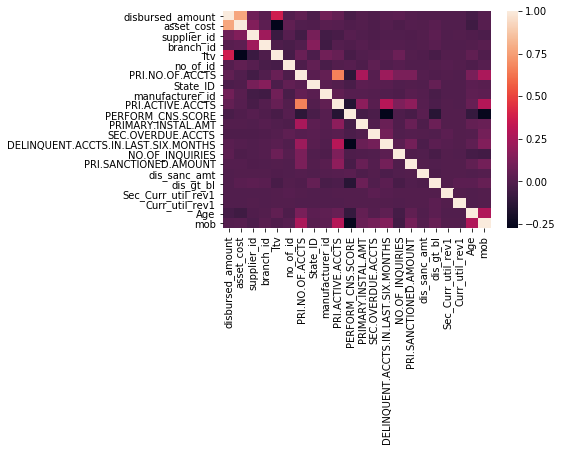

In [256]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [482]:
corr.to_csv("C:\\Swati\\Hackathon\\corr.csv")

In [257]:
X = pd.get_dummies(X)

In [108]:
pd.options.display.max_columns = 999

In [258]:
del(Y_test_thick_1)
del(Y_train_thick_1)
del(X_test_thick_1)
del(X_train_thick_1)

In [69]:
from sklearn.model_selection import train_test_split

In [259]:
X_train_thick_1 ,X_test_thick_1, Y_train_thick_1, Y_test_thick_1 = train_test_split(X,Y,test_size= 0.3,random_state = 123)

In [260]:
print(X_train_thick_1.shape)
print(X_test_thick_1.shape)
print(Y_train_thick_1.shape)
print(Y_test_thick_1.shape)

(73432, 24)
(31471, 24)
(73432,)
(31471,)


In [184]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

%matplotlib inline

In [261]:

model = RandomForestClassifier(n_estimators=50,max_features = 5,criterion = 'entropy',oob_score = True,warm_start =True, n_jobs=-1,verbose = True)
## Building simple model , further parameter tuning can also be done based on cross validation
## Depth of the tree & number of trees can tuned to control overfitting
model.fit(X_train_thick_1, Y_train_thick_1)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=True,
            warm_start=True)

In [262]:
print(model.oob_score_)

0.7903502560191742


In [263]:
model.score(X_train_thick_1, Y_train_thick_1)
model.score(X_test_thick_1, Y_test_thick_1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


0.8008960630421658

In [264]:
print(sum(Y_train_thick_1))
print(sum(Y_test_thick_1))

print(sum(model.predict(X_train_thick_1)))
print(sum(model.predict(X_test_thick_1)))

14908
6180


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


14872
346


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


In [203]:
y_class = pd.DataFrame(model.predict(X_test_thick_1))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.6s finished


In [243]:
print(sum(model.predict(X_test_thick_1)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s


391


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [218]:
y_pred = model.predict_proba(X_test_thick_1)
thresh = 0.2
thresh_pred = (y_pred[:, 1]>thresh).astype(int)
print(classification_report(Y_test_thick_1, thresh_pred, target_names=['Good', 'Bad']))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s


              precision    recall  f1-score   support

        Good       0.87      0.59      0.71     25291
         Bad       0.28      0.65      0.39      6180

   micro avg       0.60      0.60      0.60     31471
   macro avg       0.58      0.62      0.55     31471
weighted avg       0.76      0.60      0.64     31471



[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.1s finished


In [205]:
imp = pd.DataFrame([model.feature_importances_]).T
imp.index = pd.DataFrame(X_train_thick_1).columns
imp.columns = ['imp']
imp = imp.sort_values('imp')
imp['y'] = imp.index
print(imp)

                                          imp  \
SEC.OVERDUE.ACCTS                    0.001408   
dis_gt_bl                            0.004558   
Sec_Curr_util_rev1                   0.004896   
no_of_id                             0.009138   
Employment.Type_Salaried             0.009560   
Employment.Type_Self employed        0.009683   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  0.013310   
NO.OF_INQUIRIES                      0.019015   
dis_sanc_amt                         0.022341   
manufacturer_id                      0.032382   
PRI.ACTIVE.ACCTS                     0.035653   
State_ID                             0.061999   
PRIMARY.INSTAL.AMT                   0.082535   
Curr_util_rev1                       0.083488   
Age                                  0.087512   
mob                                  0.093208   
PRI.SANCTIONED.AMOUNT                0.093641   
PERFORM_CNS.SCORE                    0.102134   
asset_cost                           0.112012   
ltv                 

In [206]:
print(imp.iloc[:0:-1])

                                          imp  \
ltv                                  0.121526   
asset_cost                           0.112012   
PERFORM_CNS.SCORE                    0.102134   
PRI.SANCTIONED.AMOUNT                0.093641   
mob                                  0.093208   
Age                                  0.087512   
Curr_util_rev1                       0.083488   
PRIMARY.INSTAL.AMT                   0.082535   
State_ID                             0.061999   
PRI.ACTIVE.ACCTS                     0.035653   
manufacturer_id                      0.032382   
dis_sanc_amt                         0.022341   
NO.OF_INQUIRIES                      0.019015   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  0.013310   
Employment.Type_Self employed        0.009683   
Employment.Type_Salaried             0.009560   
no_of_id                             0.009138   
Sec_Curr_util_rev1                   0.004896   
dis_gt_bl                            0.004558   

                   

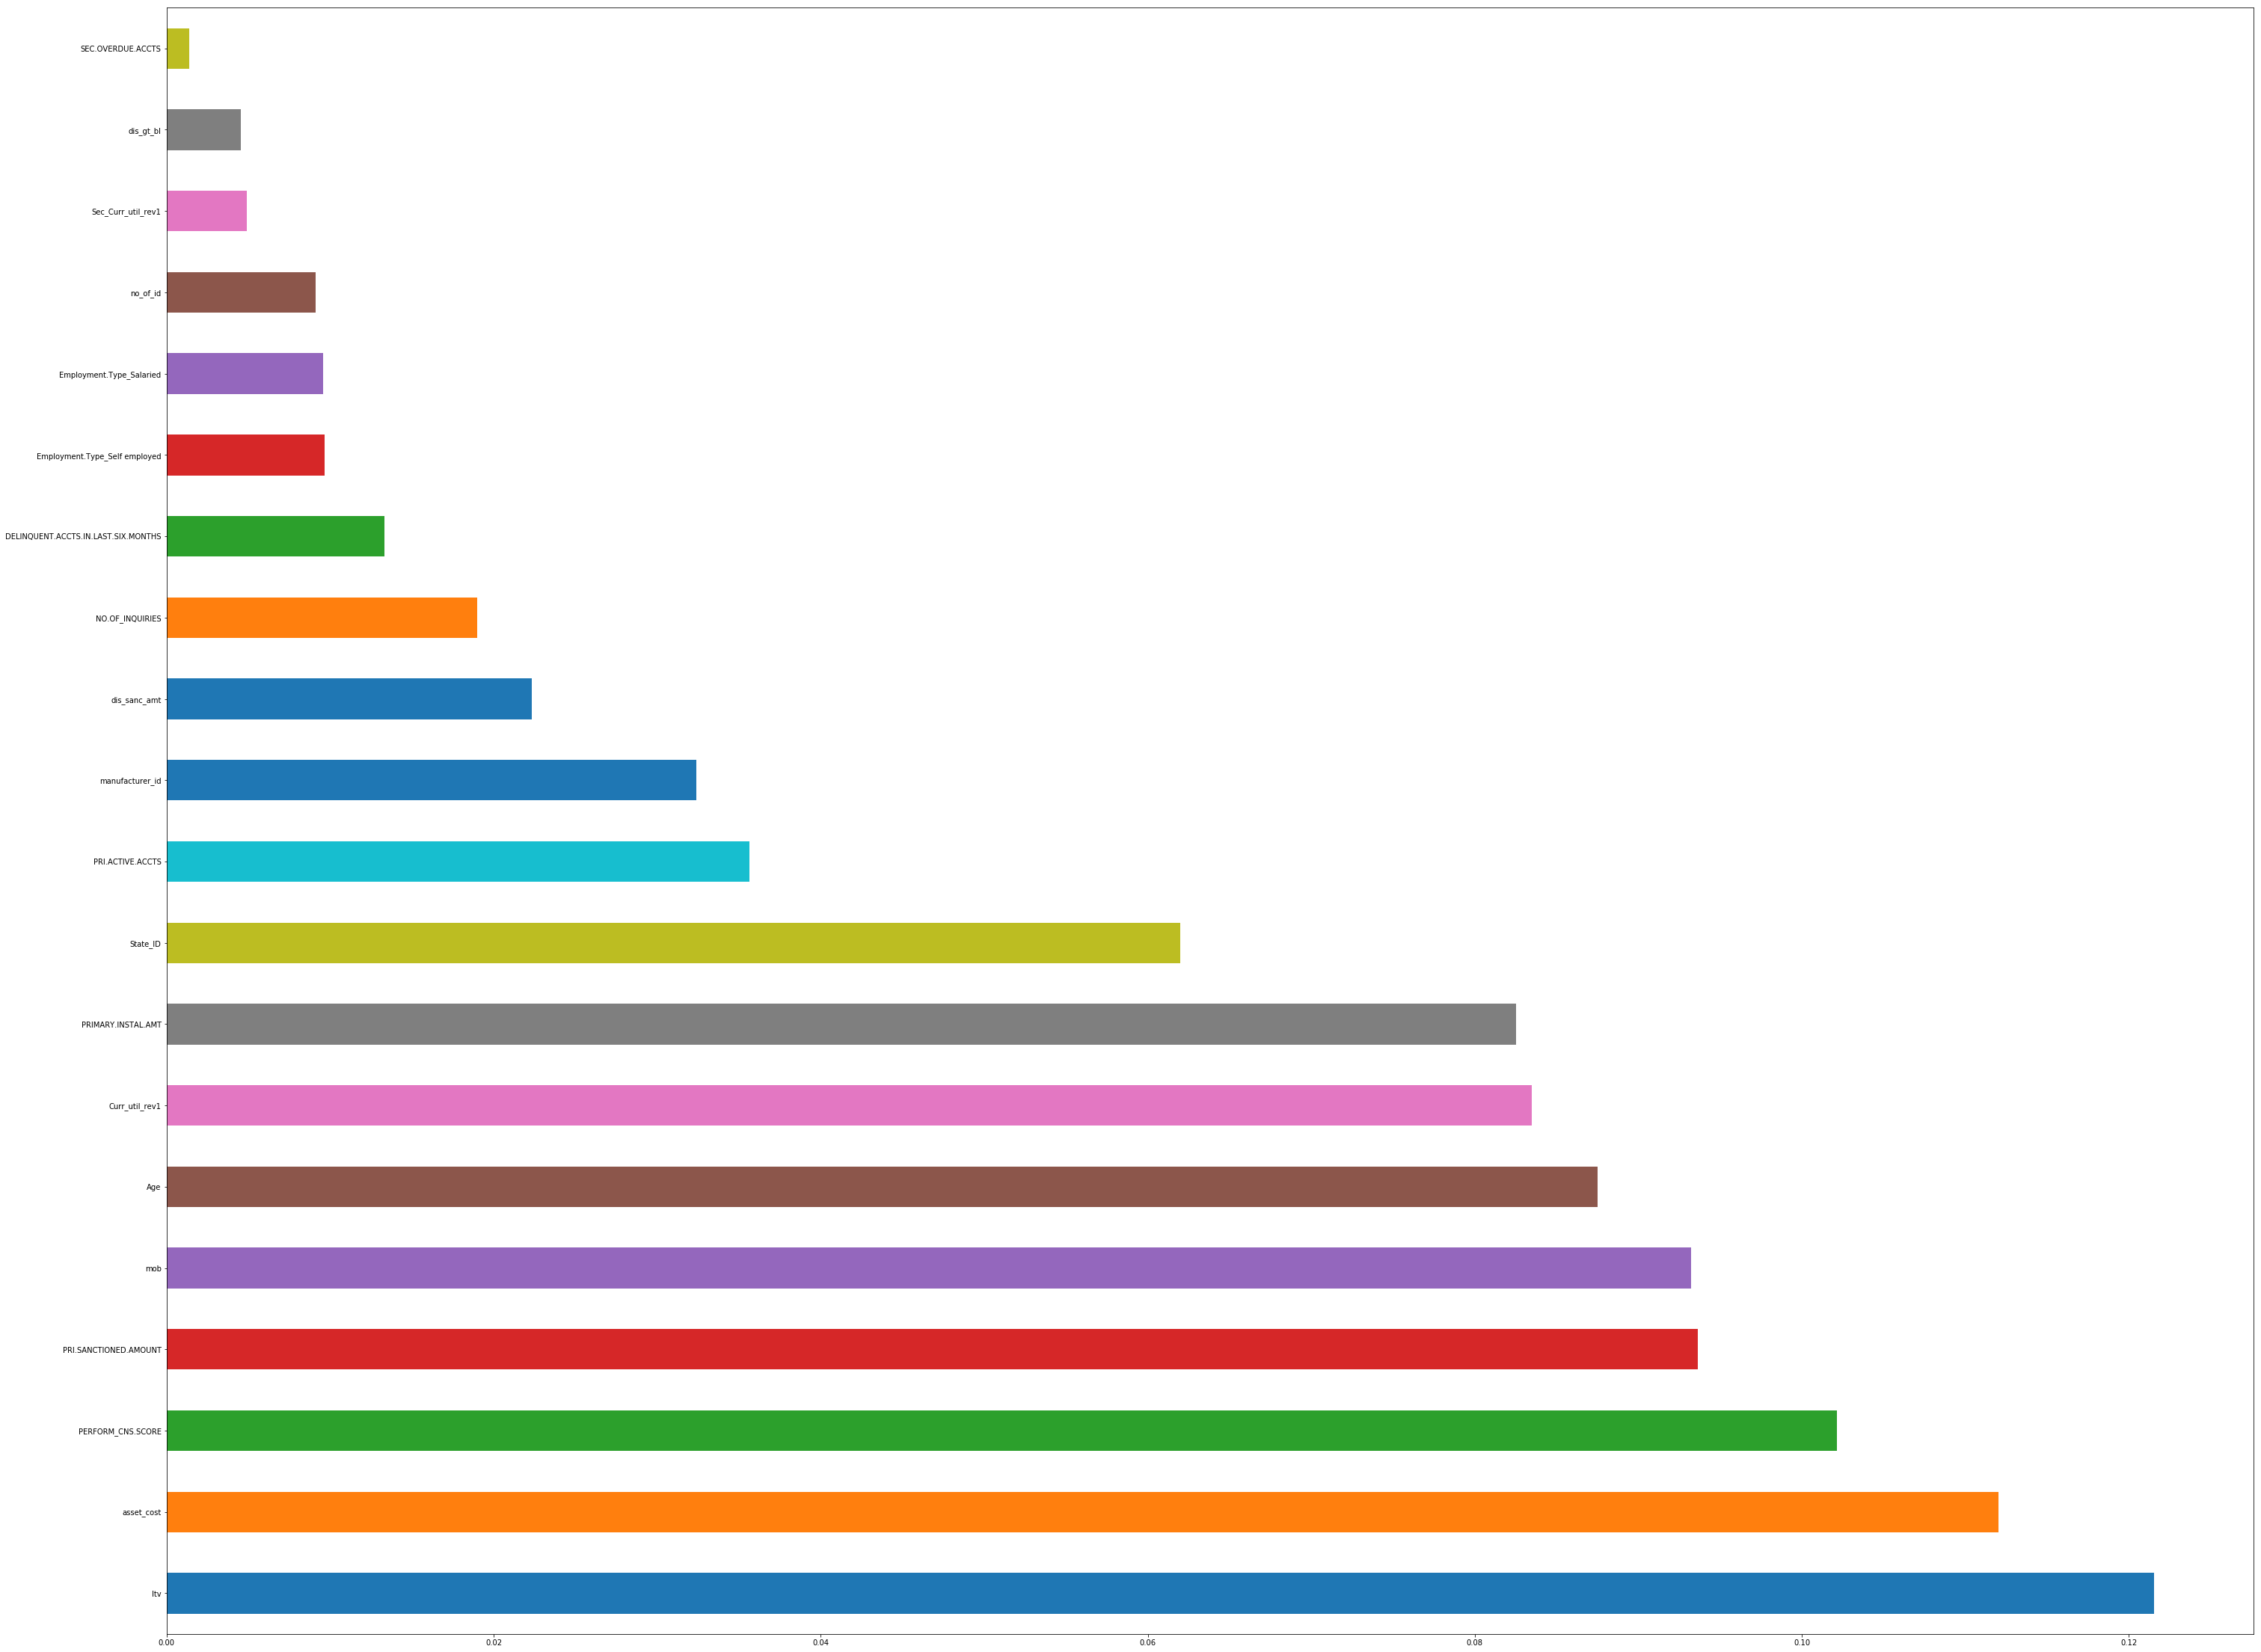

In [207]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_thick_1.columns)
plt.figure(figsize=(50,40))
feat_importances.sort_values(ascending=False).plot(kind='barh')

## train- roc 

In [234]:
y_score = model.predict_proba(X_train_thick_1)
y_test = Y_train_thick_1
thresh = 0.25
y_score = (y_score[:, 1])

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    4.3s finished


In [236]:
print(sum(Y_train_thick_1))
print(sum(y_score))

14908
14920.542000000243


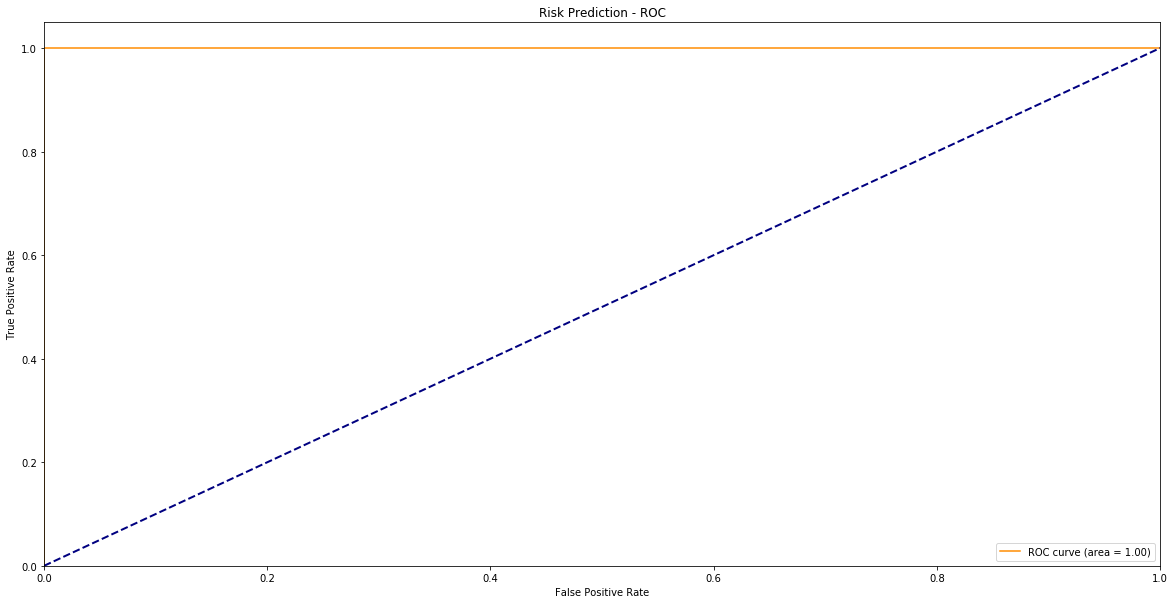

In [235]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Risk Prediction - ROC')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

In [229]:
y_score = model.predict_proba(X_test_thick_1)
y_test = Y_test_thick_1
thresh = 0.25
y_score = (y_score[:, 1]>thresh).astype(int)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.0s finished


In [230]:
print(y_score)

[0 0 0 ... 1 1 0]


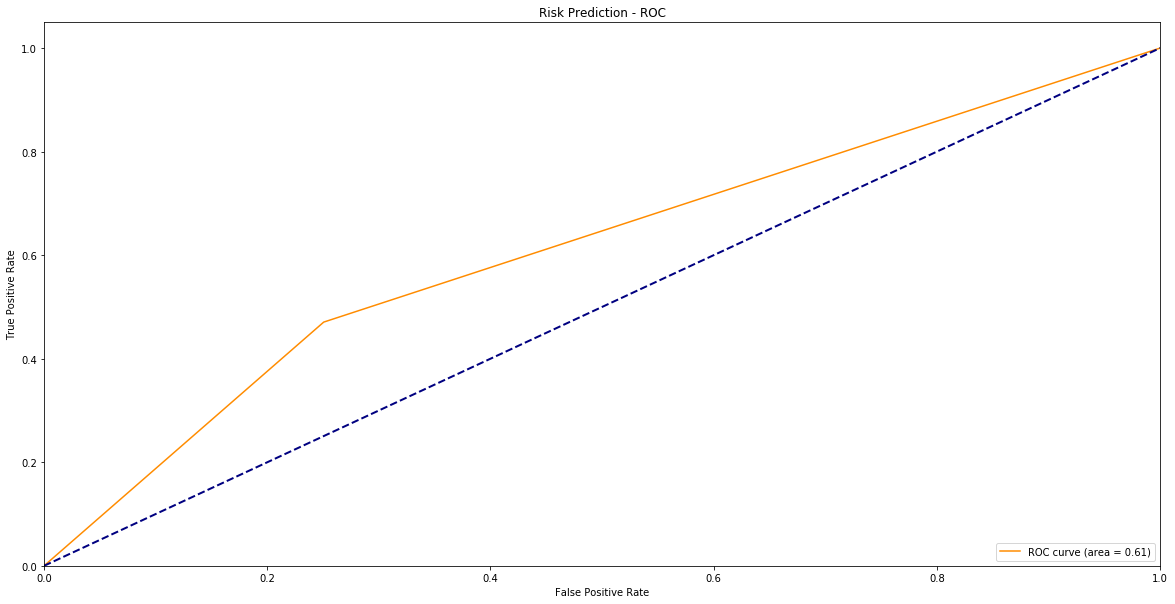

In [231]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Risk Prediction - ROC')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

# XGBoost 

In [83]:
!pip install xgboost

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [137]:
# fit model no training data
model_xg = XGBClassifier(learning_rate = 0.02, n_estimators = 500,max_depth = 3, subsample = 0.8, gamma = 1)
model_xg.fit(X_train_thick_1, Y_train_thick_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [138]:
y_pred_xg = model_xg.predict(X_test_thick_1)
predictions = [round(value) for value in y_pred_xg]
# evaluate predictions
accuracy = accuracy_score(Y_test_thick_1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.38%


###  Tuning XGB

In [139]:
eval_set = [(X_train_thick_1, Y_train_thick_1), (X_test_thick_1, Y_test_thick_1)]
eval_metric = ["auc","error"]
%time model_xg.fit(X_train_thick_1, Y_train_thick_1, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.618372	validation_0-error:0.203018	validation_1-auc:0.613921	validation_1-error:0.196371
[1]	validation_0-auc:0.621768	validation_0-error:0.203018	validation_1-auc:0.61596	validation_1-error:0.196371
[2]	validation_0-auc:0.623301	validation_0-error:0.203018	validation_1-auc:0.616804	validation_1-error:0.196371
[3]	validation_0-auc:0.62359	validation_0-error:0.203018	validation_1-auc:0.61751	validation_1-error:0.196371
[4]	validation_0-auc:0.624298	validation_0-error:0.203018	validation_1-auc:0.618211	validation_1-error:0.196371
[5]	validation_0-auc:0.628176	validation_0-error:0.203018	validation_1-auc:0.622025	validation_1-error:0.196371
[6]	validation_0-auc:0.62837	validation_0-error:0.203018	validation_1-auc:0.622072	validation_1-error:0.196371
[7]	validation_0-auc:0.629147	validation_0-error:0.203018	validation_1-auc:0.622298	validation_1-error:0.196371
[8]	validation_0-auc:0.635201	validation_0-error:0.203018	validation_1-auc:0.629234	validation_1-error:0.196

[73]	validation_0-auc:0.652232	validation_0-error:0.203018	validation_1-auc:0.644841	validation_1-error:0.196371
[74]	validation_0-auc:0.652457	validation_0-error:0.203018	validation_1-auc:0.645025	validation_1-error:0.196371
[75]	validation_0-auc:0.652636	validation_0-error:0.203018	validation_1-auc:0.645199	validation_1-error:0.196371
[76]	validation_0-auc:0.652712	validation_0-error:0.203018	validation_1-auc:0.645253	validation_1-error:0.196371
[77]	validation_0-auc:0.652952	validation_0-error:0.203018	validation_1-auc:0.645546	validation_1-error:0.196371
[78]	validation_0-auc:0.653168	validation_0-error:0.203018	validation_1-auc:0.645641	validation_1-error:0.196371
[79]	validation_0-auc:0.653459	validation_0-error:0.203018	validation_1-auc:0.645922	validation_1-error:0.196371
[80]	validation_0-auc:0.653602	validation_0-error:0.203018	validation_1-auc:0.646082	validation_1-error:0.196371
[81]	validation_0-auc:0.653874	validation_0-error:0.203018	validation_1-auc:0.646308	validation_

[146]	validation_0-auc:0.664991	validation_0-error:0.203018	validation_1-auc:0.656545	validation_1-error:0.196371
[147]	validation_0-auc:0.665132	validation_0-error:0.203018	validation_1-auc:0.656601	validation_1-error:0.196371
[148]	validation_0-auc:0.665209	validation_0-error:0.203018	validation_1-auc:0.656658	validation_1-error:0.196371
[149]	validation_0-auc:0.66533	validation_0-error:0.203018	validation_1-auc:0.656743	validation_1-error:0.196371
[150]	validation_0-auc:0.665471	validation_0-error:0.203018	validation_1-auc:0.656905	validation_1-error:0.196371
[151]	validation_0-auc:0.665544	validation_0-error:0.203018	validation_1-auc:0.656959	validation_1-error:0.196371
[152]	validation_0-auc:0.665638	validation_0-error:0.203018	validation_1-auc:0.657073	validation_1-error:0.196371
[153]	validation_0-auc:0.665734	validation_0-error:0.203018	validation_1-auc:0.657163	validation_1-error:0.196371
[154]	validation_0-auc:0.665843	validation_0-error:0.203018	validation_1-auc:0.657311	val

[218]	validation_0-auc:0.673277	validation_0-error:0.203004	validation_1-auc:0.663007	validation_1-error:0.196371
[219]	validation_0-auc:0.673323	validation_0-error:0.203004	validation_1-auc:0.663065	validation_1-error:0.196371
[220]	validation_0-auc:0.673435	validation_0-error:0.203004	validation_1-auc:0.663121	validation_1-error:0.196371
[221]	validation_0-auc:0.673502	validation_0-error:0.203004	validation_1-auc:0.663127	validation_1-error:0.196371
[222]	validation_0-auc:0.673554	validation_0-error:0.203004	validation_1-auc:0.663144	validation_1-error:0.196371
[223]	validation_0-auc:0.673618	validation_0-error:0.203004	validation_1-auc:0.663211	validation_1-error:0.196371
[224]	validation_0-auc:0.67373	validation_0-error:0.203004	validation_1-auc:0.663317	validation_1-error:0.196371
[225]	validation_0-auc:0.673819	validation_0-error:0.203004	validation_1-auc:0.663385	validation_1-error:0.196371
[226]	validation_0-auc:0.673927	validation_0-error:0.203004	validation_1-auc:0.663408	val

[290]	validation_0-auc:0.678113	validation_0-error:0.202868	validation_1-auc:0.666131	validation_1-error:0.196244
[291]	validation_0-auc:0.678163	validation_0-error:0.202868	validation_1-auc:0.666178	validation_1-error:0.196244
[292]	validation_0-auc:0.678205	validation_0-error:0.202868	validation_1-auc:0.666252	validation_1-error:0.196244
[293]	validation_0-auc:0.678273	validation_0-error:0.202868	validation_1-auc:0.666312	validation_1-error:0.196244
[294]	validation_0-auc:0.678331	validation_0-error:0.202882	validation_1-auc:0.666314	validation_1-error:0.196244
[295]	validation_0-auc:0.67837	validation_0-error:0.202882	validation_1-auc:0.666352	validation_1-error:0.196244
[296]	validation_0-auc:0.678386	validation_0-error:0.202868	validation_1-auc:0.666351	validation_1-error:0.196244
[297]	validation_0-auc:0.678406	validation_0-error:0.202868	validation_1-auc:0.666391	validation_1-error:0.196244
[298]	validation_0-auc:0.678464	validation_0-error:0.202854	validation_1-auc:0.666447	val

[363]	validation_0-auc:0.681499	validation_0-error:0.202691	validation_1-auc:0.668318	validation_1-error:0.196117
[364]	validation_0-auc:0.681528	validation_0-error:0.202677	validation_1-auc:0.668344	validation_1-error:0.196117
[365]	validation_0-auc:0.681572	validation_0-error:0.202677	validation_1-auc:0.668338	validation_1-error:0.196149
[366]	validation_0-auc:0.681596	validation_0-error:0.202691	validation_1-auc:0.668324	validation_1-error:0.196149
[367]	validation_0-auc:0.68161	validation_0-error:0.202705	validation_1-auc:0.668327	validation_1-error:0.196149
[368]	validation_0-auc:0.681664	validation_0-error:0.202705	validation_1-auc:0.668372	validation_1-error:0.196149
[369]	validation_0-auc:0.681713	validation_0-error:0.202705	validation_1-auc:0.668408	validation_1-error:0.196149
[370]	validation_0-auc:0.681753	validation_0-error:0.202705	validation_1-auc:0.668425	validation_1-error:0.196181
[371]	validation_0-auc:0.681794	validation_0-error:0.202705	validation_1-auc:0.668433	val

[436]	validation_0-auc:0.684257	validation_0-error:0.202405	validation_1-auc:0.669636	validation_1-error:0.196022
[437]	validation_0-auc:0.684285	validation_0-error:0.202405	validation_1-auc:0.669655	validation_1-error:0.196022
[438]	validation_0-auc:0.684322	validation_0-error:0.202405	validation_1-auc:0.669687	validation_1-error:0.19599
[439]	validation_0-auc:0.684345	validation_0-error:0.202391	validation_1-auc:0.669693	validation_1-error:0.196022
[440]	validation_0-auc:0.684385	validation_0-error:0.202391	validation_1-auc:0.669728	validation_1-error:0.196054
[441]	validation_0-auc:0.684402	validation_0-error:0.202391	validation_1-auc:0.669723	validation_1-error:0.196054
[442]	validation_0-auc:0.684448	validation_0-error:0.202378	validation_1-auc:0.669739	validation_1-error:0.196054
[443]	validation_0-auc:0.684508	validation_0-error:0.202378	validation_1-auc:0.669791	validation_1-error:0.196054
[444]	validation_0-auc:0.684534	validation_0-error:0.202364	validation_1-auc:0.669801	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [156]:
y_pred = model_xg.predict_proba(X_test_thick_1)
thresh = 0.3
thresh_pred = (y_pred[:, 1]>thresh).astype(int)
print(classification_report(Y_test_thick_1, thresh_pred, target_names=['Good', 'Bad']))

              precision    recall  f1-score   support

        Good       0.83      0.88      0.86     25291
         Bad       0.36      0.27      0.31      6180

   micro avg       0.76      0.76      0.76     31471
   macro avg       0.60      0.58      0.58     31471
weighted avg       0.74      0.76      0.75     31471



In [140]:
y_score = model_xg.predict_proba(X_test_thick_1)
y_test = Y_test_thick_1
y_score = y_score[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

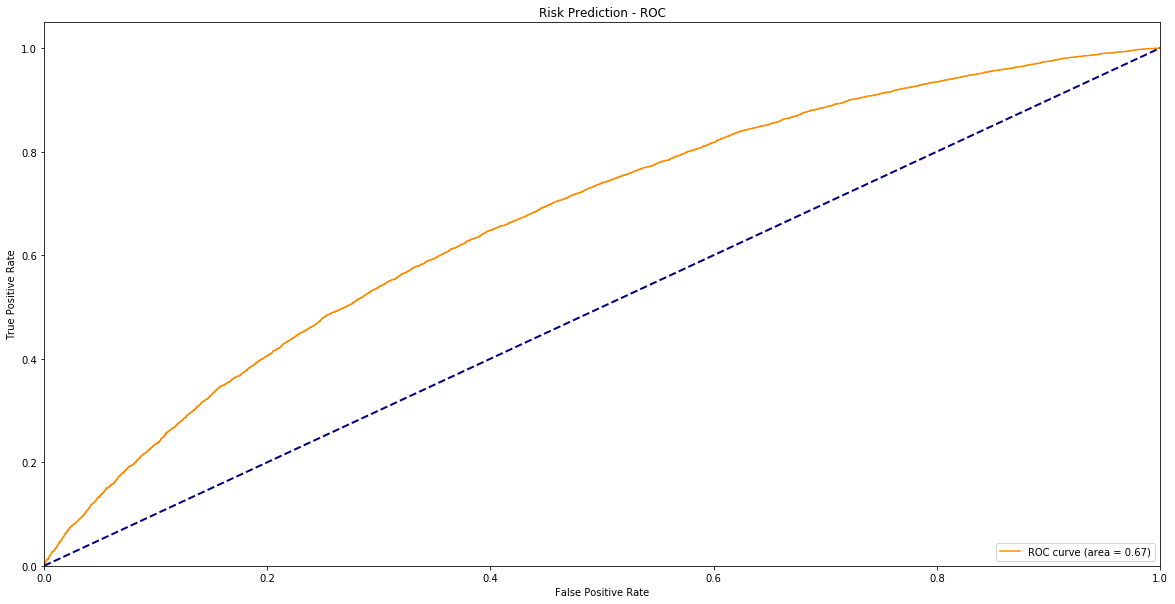

In [141]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Risk Prediction - ROC')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

### thin

In [101]:
train_thin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128251 entries, 94932 to 87620
Data columns (total 45 columns):
UniqueID                               128251 non-null int64
disbursed_amount                       128251 non-null int64
asset_cost                             128251 non-null int64
ltv                                    128251 non-null float64
branch_id                              128251 non-null int64
supplier_id                            128251 non-null int64
manufacturer_id                        128251 non-null int64
Current_pincode_ID                     128251 non-null int64
Date.of.Birth                          128251 non-null object
Employment.Type                        122776 non-null object
DisbursalDate                          128251 non-null object
State_ID                               128251 non-null int64
Employee_code_ID                       128251 non-null int64
MobileNo_Avl_Flag                      128251 non-null int64
Aadhar_flag                

In [116]:
train_thin["no_of_id"]= train_thin["Aadhar_flag"] + train_thin["PAN_flag"] + train_thin["VoterID_flag"] + train_thin["Driving_flag"] + train_thin["Passport_flag"]

In [123]:
train_thin["AVERAGE.ACCT.AGE"].value_counts(normalize = True)

0yrs 0mon      0.926800
0yrs 1mon      0.014963
0yrs 2mon      0.013559
0yrs 3mon      0.003244
1yrs 0mon      0.001934
0yrs 4mon      0.001910
0yrs 5mon      0.001692
0yrs 6mon      0.001614
0yrs 11mon     0.001513
0yrs 10mon     0.001388
0yrs 7mon      0.001372
1yrs 1mon      0.001365
0yrs 9mon      0.001357
0yrs 8mon      0.001326
1yrs 3mon      0.001115
1yrs 6mon      0.001107
2yrs 0mon      0.001107
1yrs 2mon      0.000959
1yrs 4mon      0.000920
1yrs 7mon      0.000912
2yrs 1mon      0.000873
1yrs 5mon      0.000834
1yrs 11mon     0.000803
1yrs 9mon      0.000772
1yrs 8mon      0.000710
1yrs 10mon     0.000678
2yrs 2mon      0.000554
3yrs 0mon      0.000522
2yrs 3mon      0.000522
3yrs 2mon      0.000499
                 ...   
13yrs 6mon     0.000016
9yrs 8mon      0.000016
13yrs 0mon     0.000016
11yrs 4mon     0.000008
18yrs 11mon    0.000008
12yrs 4mon     0.000008
14yrs 5mon     0.000008
17yrs 10mon    0.000008
13yrs 1mon     0.000008
9yrs 4mon      0.000008
13yrs 10mon    0

In [124]:

X = train_thin[[
'ltv',
'Employment.Type',
'no_of_id',
'State_ID',
'manufacturer_id',
'asset_cost',
'disbursed_amount',
'NO.OF_INQUIRIES',
'Age'
]]
Y = train_thin["loan_default"]


In [125]:
X = pd.get_dummies(X)

In [299]:
X.head(5)


,disbursed_amount,asset_cost,ltv,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NO.OF_INQUIRIES,Age,Employment.Type_Salaried,Employment.Type_Self employed
94932,70817,101762,71.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19,0,0
125580,52078,74316,72.66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0
26617,56259,68386,84.81,1,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0
88575,71817,106280,69.63,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0,0
4621,47718,62600,83.07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0


In [126]:
X_train_thin ,X_test_thin, Y_train_thin, Y_test_thin = train_test_split(X,Y,test_size= 0.2,random_state = 123)


In [127]:
print(X_train_thin.shape)
print(X_test_thin.shape)
print(Y_train_thin.shape)
print(Y_test_thin.shape)


(102600, 10)
(25651, 10)
(102600,)
(25651,)


##  Random Forest

In [333]:
model_thin = RandomForestClassifier(n_estimators=100, n_jobs=-1,verbose = True)
## Building simple model , further parameter tuning can also be done based on cross validation
## Depth of the tree & number of trees can tuned to control overfitting
model_thin.fit(X_train_thin, Y_train_thin)



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [368]:
model_thin.score(X_test_thin, Y_test_thin)


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


0.7524852832248256

In [ ]:
y_class = pd.DataFrame(model_thin.predict(X_test_thin))


In [335]:

y_pred = model_thin.predict_proba(X_test_thin)
thresh = 0.15
thresh_pred = (y_pred[:, 1]>thresh).astype(int)
print(classification_report(Y_test_thin, thresh_pred, target_names=['Good', 'Bad']))


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


             precision    recall  f1-score   support

       Good       0.81      0.35      0.48     19782
        Bad       0.25      0.73      0.37      5869

avg / total       0.68      0.43      0.46     25651



In [336]:

imp = pd.DataFrame([model_thin.feature_importances_]).T
imp.index = pd.DataFrame(X_train_thin).columns
imp.columns = ['imp']
imp = imp.sort_values('imp')
imp['y'] = imp.index
print(imp)

                                    imp                              y
SEC.OVERDUE.ACCTS              0.000508              SEC.OVERDUE.ACCTS
Passport_flag                  0.000556                  Passport_flag
SEC.ACTIVE.ACCTS               0.000678               SEC.ACTIVE.ACCTS
SEC.INSTAL.AMT                 0.001024                 SEC.INSTAL.AMT
SEC.CURRENT.BALANCE            0.001137            SEC.CURRENT.BALANCE
SEC.DISBURSED.AMOUNT           0.001242           SEC.DISBURSED.AMOUNT
SEC.SANCTIONED.AMOUNT          0.001294          SEC.SANCTIONED.AMOUNT
SEC.NO.OF.ACCTS                0.002102                SEC.NO.OF.ACCTS
Driving_flag                   0.002808                   Driving_flag
Aadhar_flag                    0.004047                    Aadhar_flag
VoterID_flag                   0.004058                   VoterID_flag
Employment.Type_Self employed  0.005167  Employment.Type_Self employed
Employment.Type_Salaried       0.005283       Employment.Type_Salaried
PAN_fl

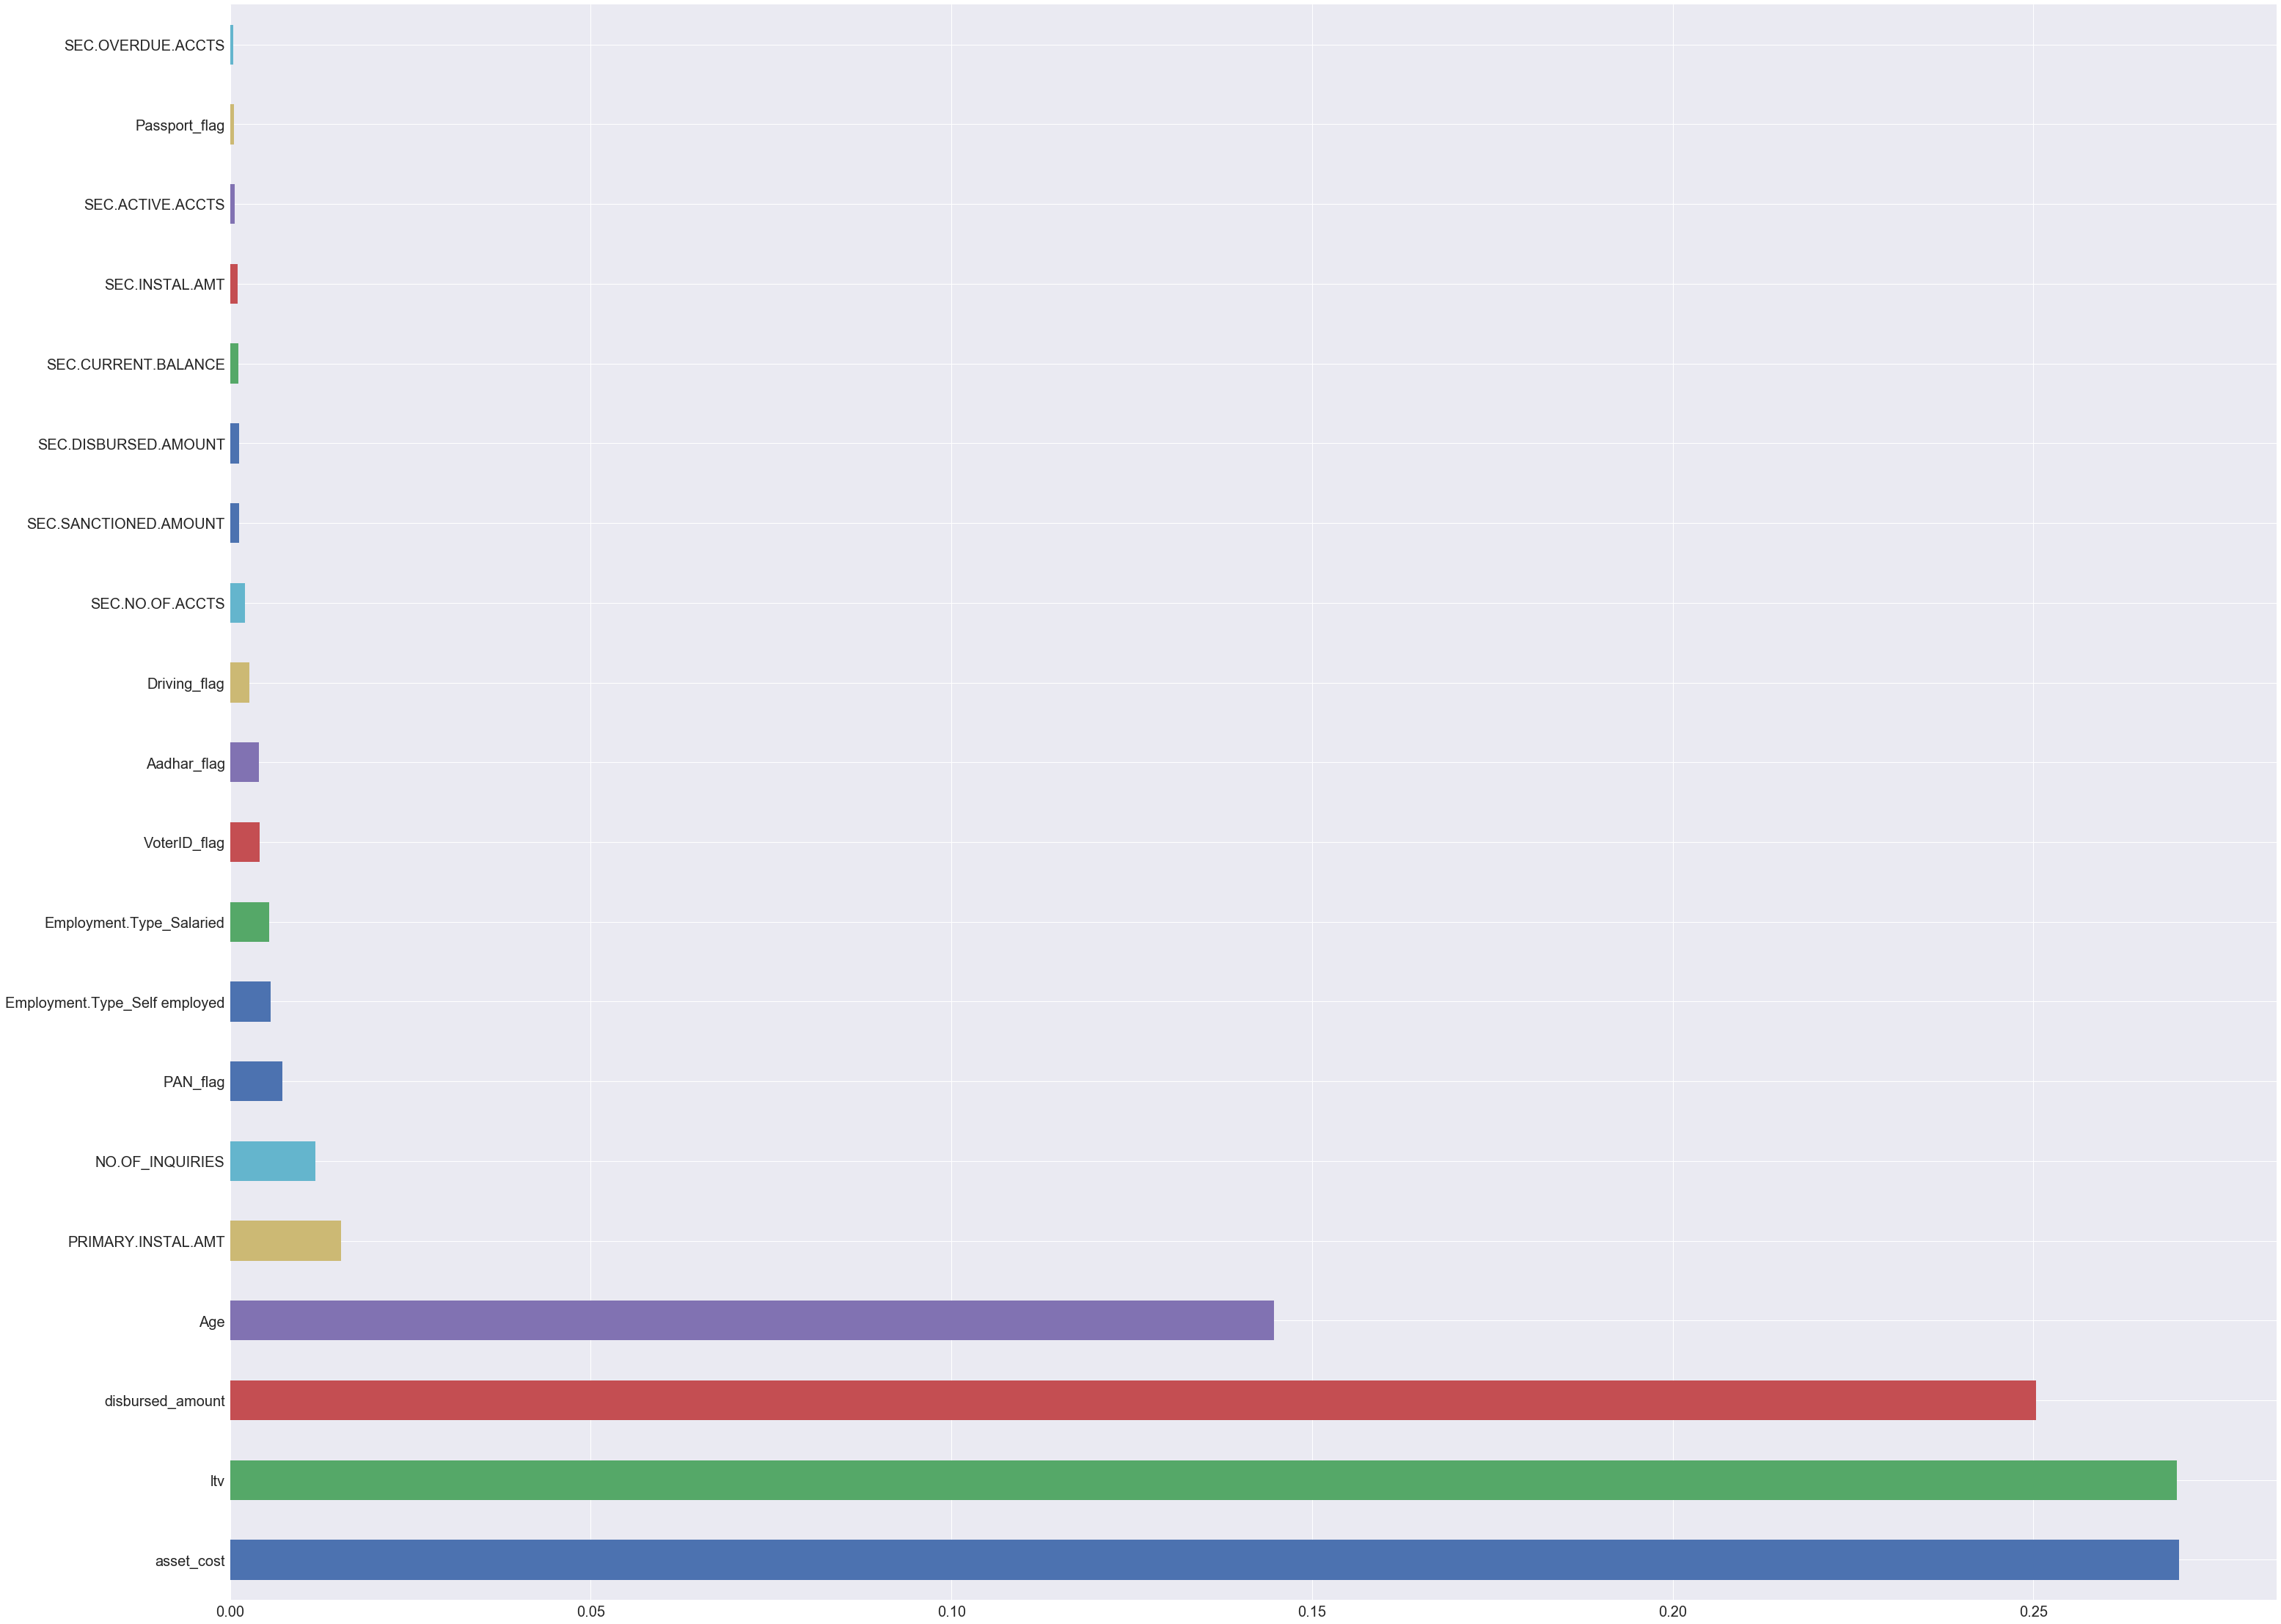

In [310]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_thin.columns)
plt.figure(figsize=(50,40))
feat_importances.sort_values(ascending=False).plot(kind='barh')

In [337]:

y_score = model_thin.predict_proba(X_test_thin)
y_test = Y_test_thin
y_score = y_score[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


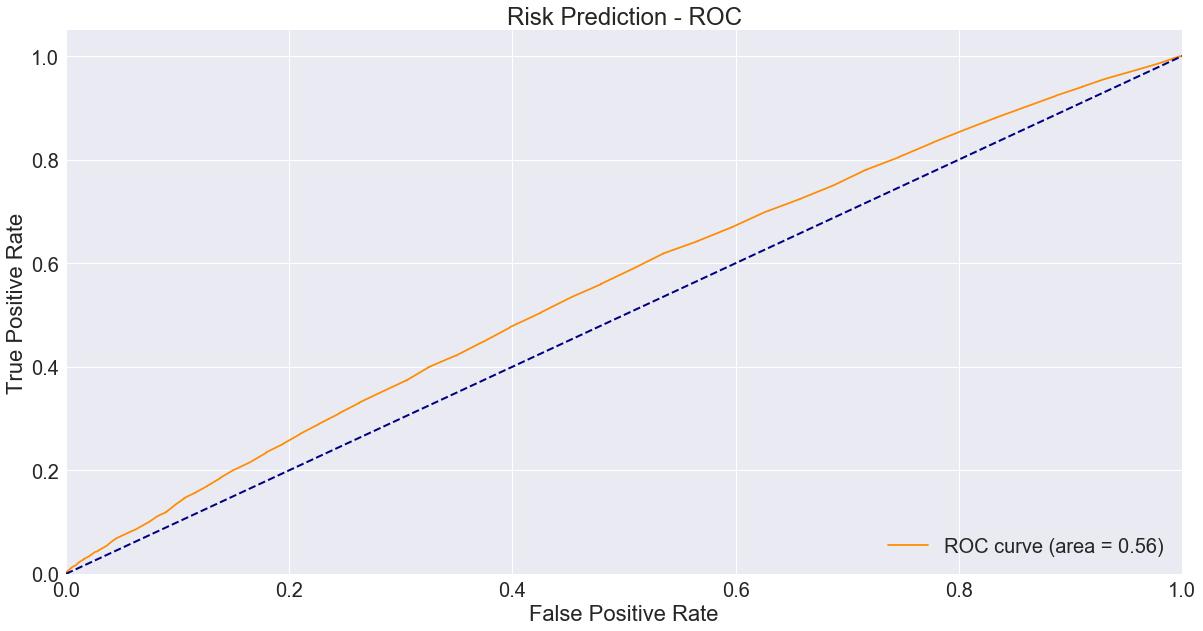

In [313]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Risk Prediction - ROC')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

## XGBoost 

In [132]:
model_xg_thin = XGBClassifier(learning_rate = 0.01, n_estimators = 500,max_depth = 3, subsample = 0.8, gamma = 1)
model_xg_thin.fit(X_train_thin, Y_train_thin)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [133]:
y_pred_xg = model_xg_thin.predict(X_test_thin)
predictions = [round(value) for value in y_pred_xg]
# evaluate predictions
accuracy = accuracy_score(Y_test_thin, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.12%


## Tuning XGB 

In [134]:
eval_set = [(X_train_thin, Y_train_thin), (X_test_thin, Y_test_thin)]
eval_metric = ["auc","error"]
%time model_xg_thin.fit(X_train_thin, Y_train_thin, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.600834	validation_0-error:0.230546	validation_1-auc:0.604218	validation_1-error:0.228802
[1]	validation_0-auc:0.601207	validation_0-error:0.230546	validation_1-auc:0.604749	validation_1-error:0.228802
[2]	validation_0-auc:0.603473	validation_0-error:0.230546	validation_1-auc:0.609143	validation_1-error:0.228802
[3]	validation_0-auc:0.603828	validation_0-error:0.230546	validation_1-auc:0.60968	validation_1-error:0.228802
[4]	validation_0-auc:0.605695	validation_0-error:0.230546	validation_1-auc:0.611666	validation_1-error:0.228802
[5]	validation_0-auc:0.605566	validation_0-error:0.230546	validation_1-auc:0.611424	validation_1-error:0.228802
[6]	validation_0-auc:0.605137	validation_0-error:0.230546	validation_1-auc:0.611023	validation_1-error:0.228802
[7]	validation_0-auc:0.605123	validation_0-error:0.230546	validation_1-auc:0.611041	validation_1-error:0.228802
[8]	validation_0-auc:0.605223	validation_0-error:0.230546	validation_1-auc:0.611142	validation_1-error:0.

[73]	validation_0-auc:0.612686	validation_0-error:0.230546	validation_1-auc:0.618395	validation_1-error:0.228802
[74]	validation_0-auc:0.612674	validation_0-error:0.230546	validation_1-auc:0.618359	validation_1-error:0.228802
[75]	validation_0-auc:0.612688	validation_0-error:0.230546	validation_1-auc:0.618417	validation_1-error:0.228802
[76]	validation_0-auc:0.612776	validation_0-error:0.230546	validation_1-auc:0.618489	validation_1-error:0.228802
[77]	validation_0-auc:0.612828	validation_0-error:0.230546	validation_1-auc:0.618467	validation_1-error:0.228802
[78]	validation_0-auc:0.612842	validation_0-error:0.230546	validation_1-auc:0.61845	validation_1-error:0.228802
[79]	validation_0-auc:0.612878	validation_0-error:0.230546	validation_1-auc:0.618523	validation_1-error:0.228802
[80]	validation_0-auc:0.612998	validation_0-error:0.230546	validation_1-auc:0.618571	validation_1-error:0.228802
[81]	validation_0-auc:0.613158	validation_0-error:0.230546	validation_1-auc:0.618697	validation_1

[146]	validation_0-auc:0.617736	validation_0-error:0.230546	validation_1-auc:0.622553	validation_1-error:0.228802
[147]	validation_0-auc:0.617826	validation_0-error:0.230546	validation_1-auc:0.622674	validation_1-error:0.228802
[148]	validation_0-auc:0.617824	validation_0-error:0.230546	validation_1-auc:0.622671	validation_1-error:0.228802
[149]	validation_0-auc:0.61794	validation_0-error:0.230546	validation_1-auc:0.622741	validation_1-error:0.228802
[150]	validation_0-auc:0.618054	validation_0-error:0.230546	validation_1-auc:0.622788	validation_1-error:0.228802
[151]	validation_0-auc:0.618073	validation_0-error:0.230546	validation_1-auc:0.622804	validation_1-error:0.228802
[152]	validation_0-auc:0.618129	validation_0-error:0.230546	validation_1-auc:0.622899	validation_1-error:0.228802
[153]	validation_0-auc:0.618232	validation_0-error:0.230546	validation_1-auc:0.622979	validation_1-error:0.228802
[154]	validation_0-auc:0.618243	validation_0-error:0.230546	validation_1-auc:0.62299	vali

[219]	validation_0-auc:0.621613	validation_0-error:0.230546	validation_1-auc:0.625243	validation_1-error:0.228802
[220]	validation_0-auc:0.621649	validation_0-error:0.230546	validation_1-auc:0.625287	validation_1-error:0.228802
[221]	validation_0-auc:0.621698	validation_0-error:0.230546	validation_1-auc:0.625321	validation_1-error:0.228802
[222]	validation_0-auc:0.621739	validation_0-error:0.230546	validation_1-auc:0.625324	validation_1-error:0.228802
[223]	validation_0-auc:0.621773	validation_0-error:0.230546	validation_1-auc:0.625351	validation_1-error:0.228802
[224]	validation_0-auc:0.621823	validation_0-error:0.230546	validation_1-auc:0.62536	validation_1-error:0.228802
[225]	validation_0-auc:0.621886	validation_0-error:0.230546	validation_1-auc:0.625426	validation_1-error:0.228802
[226]	validation_0-auc:0.621936	validation_0-error:0.230546	validation_1-auc:0.625489	validation_1-error:0.228802
[227]	validation_0-auc:0.621976	validation_0-error:0.230546	validation_1-auc:0.625491	val

[292]	validation_0-auc:0.624582	validation_0-error:0.230546	validation_1-auc:0.627312	validation_1-error:0.228802
[293]	validation_0-auc:0.624618	validation_0-error:0.230546	validation_1-auc:0.627342	validation_1-error:0.228802
[294]	validation_0-auc:0.624649	validation_0-error:0.230546	validation_1-auc:0.627389	validation_1-error:0.228802
[295]	validation_0-auc:0.62468	validation_0-error:0.230546	validation_1-auc:0.627426	validation_1-error:0.228802
[296]	validation_0-auc:0.6247	validation_0-error:0.230546	validation_1-auc:0.627454	validation_1-error:0.228802
[297]	validation_0-auc:0.624727	validation_0-error:0.230546	validation_1-auc:0.627499	validation_1-error:0.228802
[298]	validation_0-auc:0.624774	validation_0-error:0.230546	validation_1-auc:0.627538	validation_1-error:0.228802
[299]	validation_0-auc:0.624805	validation_0-error:0.230546	validation_1-auc:0.627573	validation_1-error:0.228802
[300]	validation_0-auc:0.624847	validation_0-error:0.230546	validation_1-auc:0.627579	valid

[365]	validation_0-auc:0.626954	validation_0-error:0.230546	validation_1-auc:0.628847	validation_1-error:0.228802
[366]	validation_0-auc:0.627012	validation_0-error:0.230546	validation_1-auc:0.628849	validation_1-error:0.228802
[367]	validation_0-auc:0.627047	validation_0-error:0.230546	validation_1-auc:0.628871	validation_1-error:0.228802
[368]	validation_0-auc:0.627063	validation_0-error:0.230546	validation_1-auc:0.628876	validation_1-error:0.228802
[369]	validation_0-auc:0.627133	validation_0-error:0.230546	validation_1-auc:0.628881	validation_1-error:0.228802
[370]	validation_0-auc:0.627164	validation_0-error:0.230546	validation_1-auc:0.628894	validation_1-error:0.228802
[371]	validation_0-auc:0.627174	validation_0-error:0.230546	validation_1-auc:0.628905	validation_1-error:0.228802
[372]	validation_0-auc:0.627212	validation_0-error:0.230546	validation_1-auc:0.628947	validation_1-error:0.228802
[373]	validation_0-auc:0.627249	validation_0-error:0.230546	validation_1-auc:0.628974	va

[437]	validation_0-auc:0.628821	validation_0-error:0.230546	validation_1-auc:0.629647	validation_1-error:0.228802
[438]	validation_0-auc:0.628838	validation_0-error:0.230546	validation_1-auc:0.629648	validation_1-error:0.228802
[439]	validation_0-auc:0.628865	validation_0-error:0.230546	validation_1-auc:0.62966	validation_1-error:0.228802
[440]	validation_0-auc:0.628895	validation_0-error:0.230546	validation_1-auc:0.629714	validation_1-error:0.228802
[441]	validation_0-auc:0.628915	validation_0-error:0.230546	validation_1-auc:0.629725	validation_1-error:0.228802
[442]	validation_0-auc:0.628933	validation_0-error:0.230546	validation_1-auc:0.629717	validation_1-error:0.228802
[443]	validation_0-auc:0.628959	validation_0-error:0.230546	validation_1-auc:0.629737	validation_1-error:0.228802
[444]	validation_0-auc:0.62897	validation_0-error:0.230546	validation_1-auc:0.629735	validation_1-error:0.228802
[445]	validation_0-auc:0.628981	validation_0-error:0.230546	validation_1-auc:0.629747	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [135]:
y_score = model_xg_thin.predict_proba(X_test_thin)
y_test = Y_test_thin
y_score = y_score[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


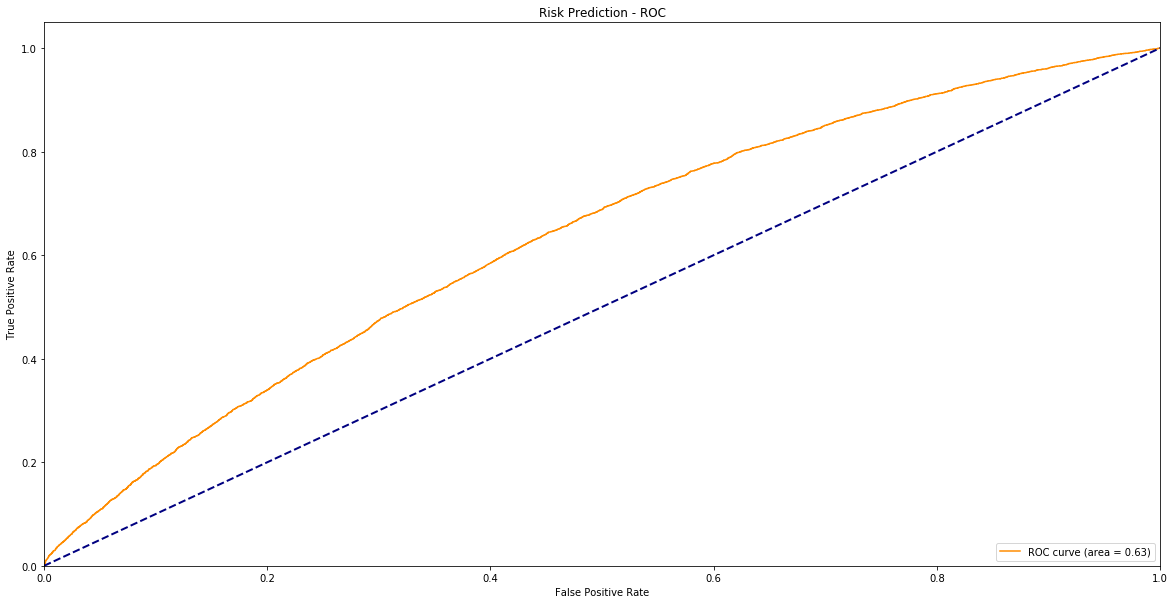

In [136]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Risk Prediction - ROC')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

In [142]:
sample_data = pd.read_csv("C:\\Users\\swati\\Downloads\\LT\\LT\\test_bqCt9Pv.csv")

In [143]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [144]:
sample_data["Disbusrsal_year"] = sample_data["DisbursalDate"].str[6:]
sample_data["Birth_year"]= sample_data["Date.of.Birth"].str[6:]
sample_data["Age"] = 100+ (sample_data["Disbusrsal_year"].astype(str).astype(int)  - sample_data["Birth_year"].astype(str).astype(int))


In [145]:
sample_thick =sample_data[~sample_data["PERFORM_CNS.SCORE.DESCRIPTION"].isin(['No Bureau History Available','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: Only a Guarantor','Not Scored: More than 50 active Accounts found' ])].reset_index()


In [146]:
sample_thin = sample_data[sample_data["PERFORM_CNS.SCORE.DESCRIPTION"].isin(['No Bureau History Available','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: Only a Guarantor','Not Scored: More than 50 active Accounts found' ])].reset_index()


In [147]:
sample_thick["Curr_Utilization"] = sample_thick["PRI.CURRENT.BALANCE"]/sample_thick["PRI.DISBURSED.AMOUNT"]
sample_thick["Curr_util_rev"] = np.where(sample_thick["Curr_Utilization"] <= 0, 0 , sample_thick["Curr_Utilization"])
sample_thick["Curr_util_rev1"] = np.where(sample_thick["PRI.DISBURSED.AMOUNT"]== 0 ,0,sample_thick["Curr_util_rev"] )

In [148]:

sample_thick.loc[(sample_thick["PRI.ACTIVE.ACCTS"] == 0), "active_accts_band"]= "No active accts"
sample_thick.loc[(sample_thick["PRI.ACTIVE.ACCTS"] >0) & (sample_thick["PRI.ACTIVE.ACCTS"] < 3), "active_accts_band"]= "1-2 active accts"
sample_thick.loc[(sample_thick["PRI.ACTIVE.ACCTS"] >2) & (sample_thick["PRI.ACTIVE.ACCTS"] < 6), "active_accts_band"]= "3-5 active accts"
sample_thick.loc[(sample_thick["PRI.ACTIVE.ACCTS"] >5), "active_accts_band"]= "Greater than 5 active accts"


In [150]:
sample_thick["no_of_id"]= sample_thick["Aadhar_flag"] + sample_thick["PAN_flag"] + sample_thick["VoterID_flag"] + sample_thick["Driving_flag"] + sample_thick["Passport_flag"]
sample_thick.loc[(sample_thick["PRI.DISBURSED.AMOUNT"] < sample_thick["PRI.CURRENT.BALANCE"]), "dis_gt_bl"]= 1
sample_thick.loc[~(sample_thick["PRI.DISBURSED.AMOUNT"] < sample_thick["PRI.CURRENT.BALANCE"]), "dis_gt_bl"]= 0

sample_thick["Sec_Curr_Utilization"] = sample_thick["SEC.CURRENT.BALANCE"]/sample_thick["SEC.DISBURSED.AMOUNT"]

sample_thick["Sec_Curr_Utilization"].value_counts(normalize = True)

sample_thick[sample_thick["SEC.CURRENT.BALANCE"]>0]

sample_thick["Sec_Curr_util_rev"] = np.where(sample_thick["Sec_Curr_Utilization"] <= 0, 0 , sample_thick["Sec_Curr_Utilization"])
sample_thick["Sec_Curr_util_rev1"] = np.where(sample_thick["SEC.DISBURSED.AMOUNT"]== 0 ,0,sample_thick["Sec_Curr_util_rev"] )

sample_thick["dis_sanc_amt"]= sample_thick["PRI.SANCTIONED.AMOUNT"] - sample_thick["PRI.DISBURSED.AMOUNT"] 

In [151]:
new = sample_thick["CREDIT.HISTORY.LENGTH"].str.split("yrs", n = 1, expand = True)

new_1 = new[1].str.split("mon",n=1,expand=True)

new_all = pd.concat([new, new_1], axis=1)
# print(new_all)
new_all.columns= ["yrs","text_mon","months","drop"]
new_all_2= new_all[["yrs","months"]]
new_all_2["yrs"] = new_all_2["yrs"].astype(str).astype(int)
new_all_2["months"] = new_all_2["months"].astype(str).astype(int)
print(new_all_2.info())

new_all_2["point_years"] = new_all_2["months"]/12

new_all_2.head(5)

new_all_2["mob"] = new_all_2["yrs"] + new_all_2["point_years"]
mob = pd.DataFrame(new_all_2["mob"])
print(mob.head(5))

sample_thick = sample_thick.merge(mob,left_index = True,right_index = True)

C:\Users\swati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\swati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\swati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50140 entries, 0 to 50139
Data columns (total 2 columns):
yrs       50140 non-null int32
months    50140 non-null int32
dtypes: int32(2)
memory usage: 391.8 KB
None
        mob
0  1.000000
1  2.416667
2  2.166667
3  2.500000
4  0.916667


In [152]:
sample_thick_score = sample_thick[[
'ltv',
'no_of_id',
'Employment.Type',
'State_ID',
'manufacturer_id',
'PRI.ACTIVE.ACCTS',
'PERFORM_CNS.SCORE',
'PRIMARY.INSTAL.AMT',
'SEC.OVERDUE.ACCTS',
'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
'NO.OF_INQUIRIES',
'PRI.CURRENT.BALANCE',
'PRI.SANCTIONED.AMOUNT',
'PRI.DISBURSED.AMOUNT',
'dis_sanc_amt',
'dis_gt_bl',
'Sec_Curr_util_rev1',
'Curr_util_rev1',
'Age',
'mob'
]]

In [153]:
sample_thick_score = pd.get_dummies(sample_thick_score)

In [157]:
y_pred = model_xg.predict_proba(sample_thick_score)
thresh = 0.30

print(y_pred)

thresh_pred = (y_pred[:, 1]>thresh).astype(int)

print(thresh_pred)

sum(thresh_pred)

sample_thick_score.shape

sample_thick["loan_default"] = thresh_pred

[[0.69348645 0.30651358]
 [0.68694174 0.31305823]
 [0.8549525  0.14504749]
 ...
 [0.7717644  0.2282356 ]
 [0.8540755  0.14592452]
 [0.78856504 0.21143498]]
[1 1 0 ... 0 0 0]


In [158]:
sample_thin["no_of_id"]= sample_thin["Aadhar_flag"] + sample_thin["PAN_flag"] + sample_thin["VoterID_flag"] + sample_thin["Driving_flag"] + sample_thin["Passport_flag"]


In [159]:
sample_thin_score = sample_thin[['ltv',
'Employment.Type',
'no_of_id',
'State_ID',
'manufacturer_id',
'asset_cost',
'disbursed_amount',
'NO.OF_INQUIRIES',
'Age'
]]

In [160]:
sample_thin_score = pd.get_dummies(sample_thin_score)

In [164]:
y_pred_thin = model_xg_thin.predict_proba(sample_thin_score)
thresh = 0.30

print(y_pred_thin)

thresh_pred = (y_pred_thin[:, 1]>thresh).astype(int)

print(thresh_pred)


sample_thin_score.shape

sample_thin["loan_default"] = thresh_pred

[[0.7316603  0.2683397 ]
 [0.7728717  0.22712831]
 [0.78622246 0.21377756]
 ...
 [0.86610675 0.13389324]
 [0.79836595 0.20163406]
 [0.88811046 0.11188954]]
[0 0 0 ... 0 0 0]


In [165]:

sum(thresh_pred)

7715

In [166]:
sample_thin.shape

(62252, 46)

In [168]:
score_thick = sample_thick[["UniqueID","loan_default"]]

In [169]:
score_thin= sample_thin[["UniqueID","loan_default"]]

In [170]:
score= score_thick.append([score_thin])

In [171]:
score.shape

(112392, 2)

In [172]:
sample_data.shape

(112392, 43)

In [175]:
score.to_csv("C:\\Users\\swati\\Downloads\\LT\\LT\\submission.csv",index= False)